# strategy_dev.ipynb 

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta
from modules.strategy import compute_indicators, apply_signals, backtest_strategy

### Load data

In [3]:
ticker = 'TCS.NS'
data = yf.download(ticker, start='2022-01-01', end='2023-12-31')

/var/folders/8h/g3x6nll914bbj2dbvzgdsd9c0000gn/T/ipykernel_13033/50268186.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


### Compute indicators and signals

In [4]:
data = compute_indicators(data)
data['RSI'] = ta.rsi(data['Close'], length=14)
data = apply_signals(data)

### Backtest strategy

In [5]:
results = backtest_strategy(data)

### Show results

In [6]:
print("ROI:", results['ROI'])
print("Win Rate:", results['Win Rate'])
print("Number of Trades:", results['Count'])
print("Trade History:")
for t in results['Trades']:
    print(f"{t[0]} on {t[1].date()} at ₹{t[2]:.2f}")


ROI: 0
Win Rate: 0
Number of Trades: 0
Trade History:


### Plot price and indicators

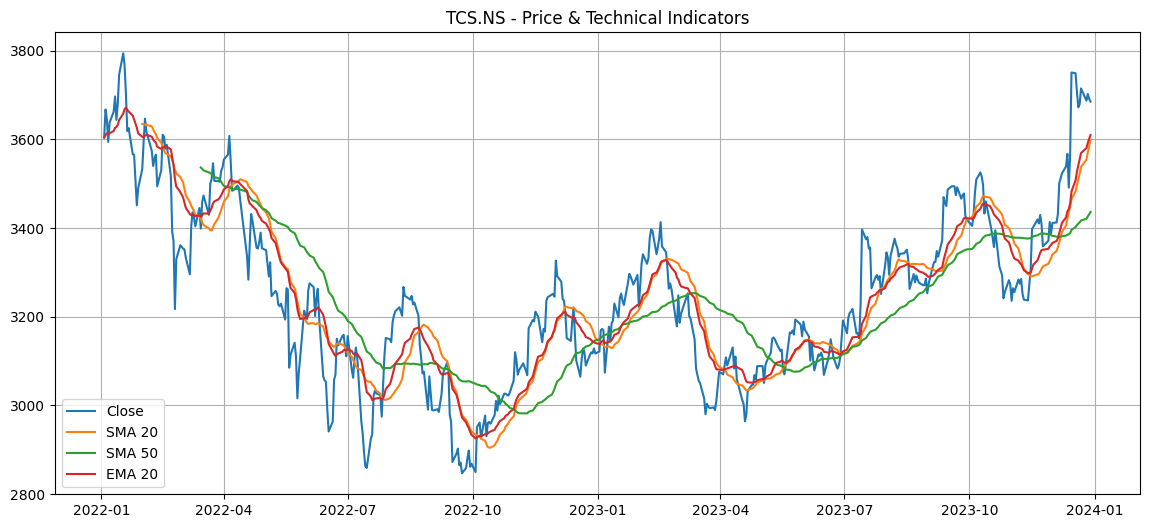

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['SMA_20'], label='SMA 20')
plt.plot(data['SMA_50'], label='SMA 50')
plt.plot(data['EMA_20'], label='EMA 20')
plt.title(f"{ticker} - Price & Technical Indicators")
plt.legend()
plt.grid()
plt.show()

### Plot RSI

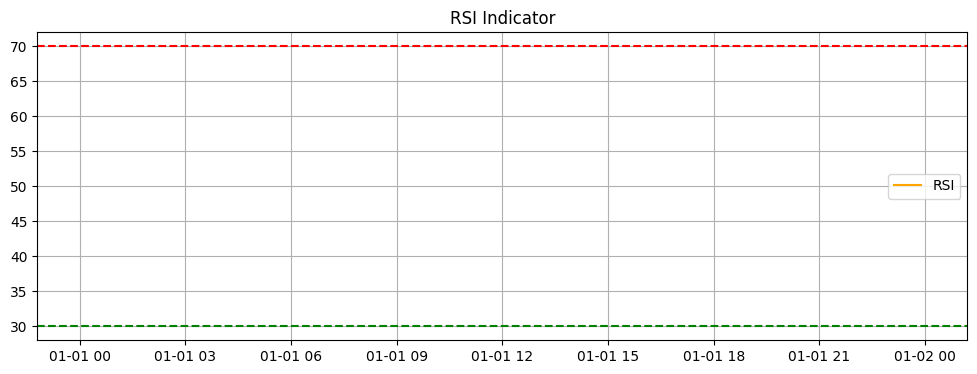

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(data['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI Indicator")
plt.legend()
plt.grid()
plt.show()